# Netflix Movies & TV Shows EDA


# Import Libraries


In [4]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10,6)


#  Load Dataset


In [5]:

df = pd.read_csv("netflix_titles.csv",encoding='latin-1')
print(df.head())
print(df.info())
print(df.isnull().sum())  # check missing values


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  ... Unnamed: 16  \
0  September 25, 2021          2020  PG-13     90 min  ...         NaN   
1  September 24, 2021          2021  TV-MA  2 Season

#  Data Cleaning


In [6]:

# Drop duplicates
df.drop_duplicates(inplace=True)

# Fill or handle missing values
df['country'].fillna("Unknown", inplace=True)
df['director'].fillna("Unknown", inplace=True)

# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


/var/folders/jx/zcfwn8ds7wncqbhz7xcskktw0000gn/T/ipykernel_67927/2138347607.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna("Unknown", inplace=True)
/var/folders/jx/zcfwn8ds7wncqbhz7xcskktw0000gn/T/ipykernel_67927/2138347607.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

#  Exploratory Data Analysis


/var/folders/jx/zcfwn8ds7wncqbhz7xcskktw0000gn/T/ipykernel_67927/1771487801.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="type", data=df, palette="Set2")


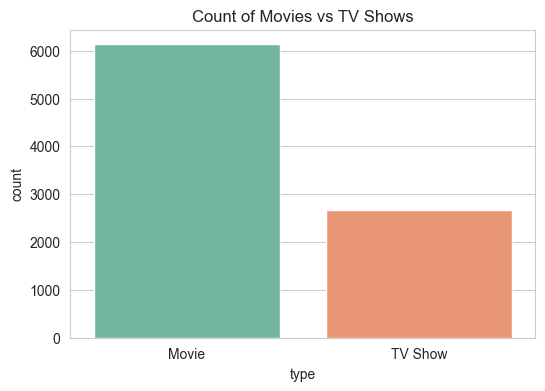

In [7]:

# Total counts of Movies vs TV Shows
plt.figure(figsize=(6,4))
sns.countplot(x="type", data=df, palette="Set2")
plt.title("Count of Movies vs TV Shows")
plt.show()


/var/folders/jx/zcfwn8ds7wncqbhz7xcskktw0000gn/T/ipykernel_67927/3065156783.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="rating", data=df, order=df['rating'].value_counts().index, palette="muted")


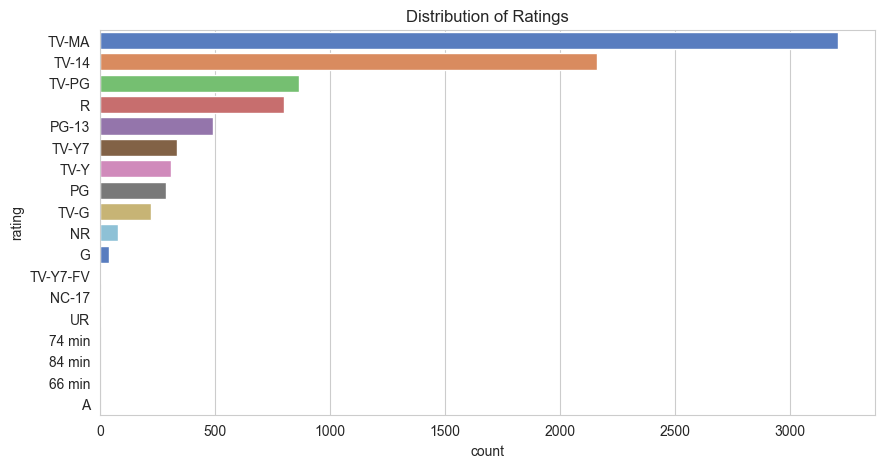

In [8]:

# Distribution of ratings
plt.figure(figsize=(10,5))
sns.countplot(y="rating", data=df, order=df['rating'].value_counts().index, palette="muted")
plt.title("Distribution of Ratings")
plt.show()


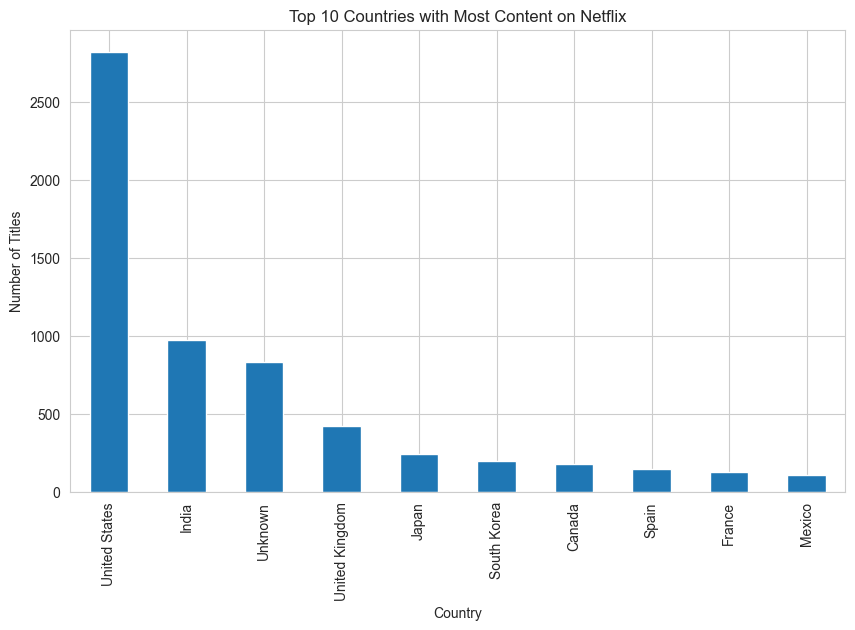

In [9]:

# Top 10 countries with most Netflix content
plt.figure(figsize=(10,6))
df['country'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Countries with Most Content on Netflix")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.show()


/var/folders/jx/zcfwn8ds7wncqbhz7xcskktw0000gn/T/ipykernel_67927/3794361148.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="year_added", data=df, palette="coolwarm")


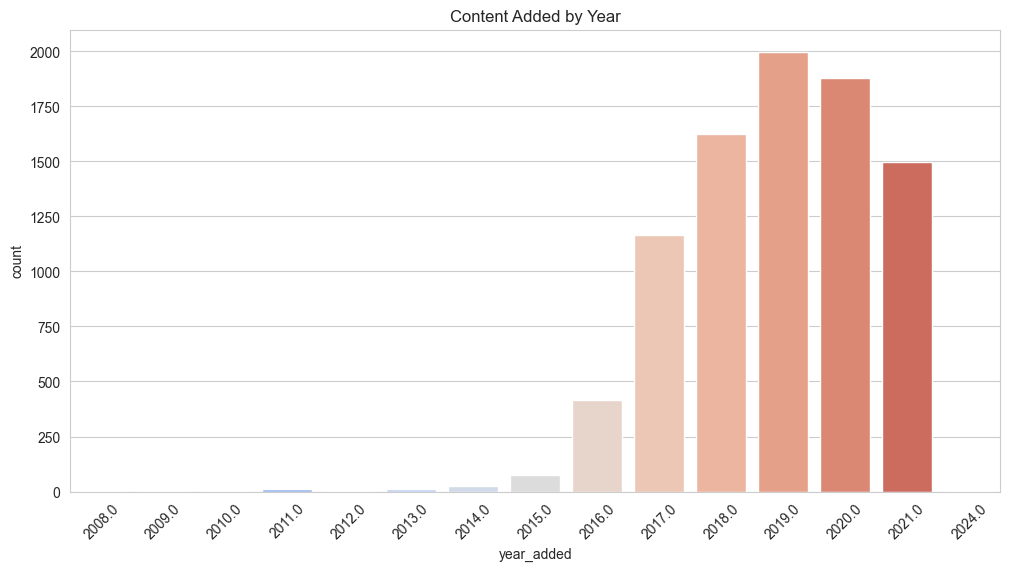

In [10]:

# Content added over the years
plt.figure(figsize=(12,6))
df['year_added'] = df['date_added'].dt.year
sns.countplot(x="year_added", data=df, palette="coolwarm")
plt.title("Content Added by Year")
plt.xticks(rotation=45)
plt.show()


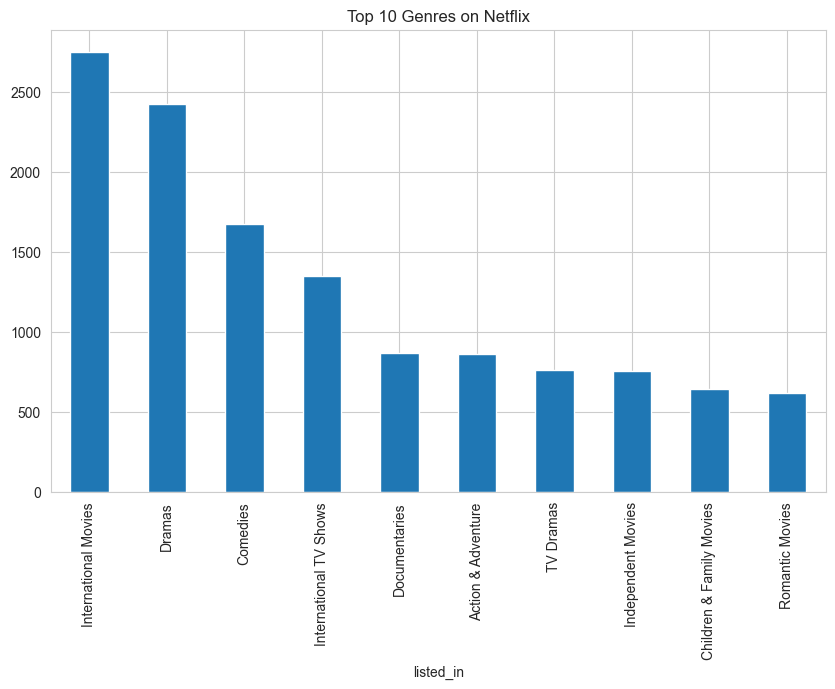

In [11]:

# Top 10 genres (listed_in)
plt.figure(figsize=(10,6))
df['listed_in'].str.split(", ").explode().value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Genres on Netflix")
plt.show()




/var/folders/jx/zcfwn8ds7wncqbhz7xcskktw0000gn/T/ipykernel_67927/4184941821.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['duration_min'] = movies_df['duration'].str.replace(" min","").astype(float)


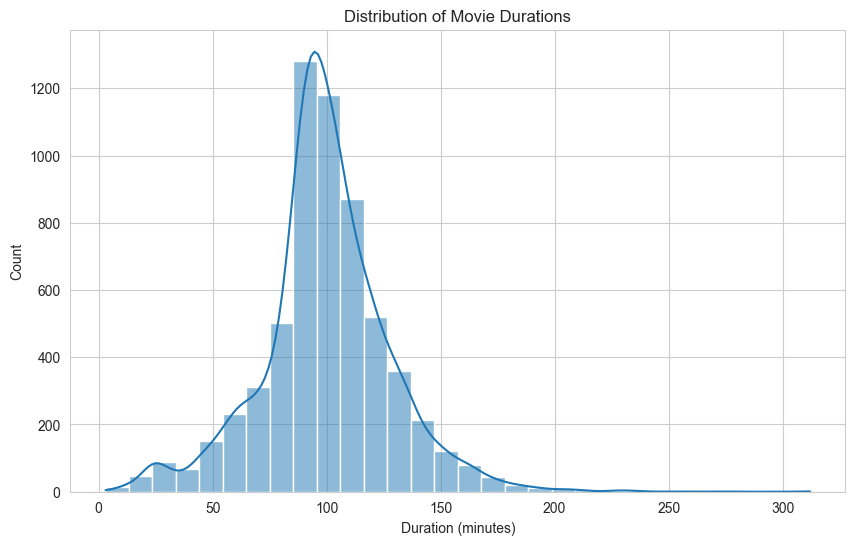

In [12]:

# Movies duration analysis
movies_df = df[df['type']=="Movie"]
plt.figure(figsize=(10,6))
movies_df['duration_min'] = movies_df['duration'].str.replace(" min","").astype(float)
sns.histplot(movies_df['duration_min'], bins=30, kde=True)
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (minutes)")
plt.show()


/var/folders/jx/zcfwn8ds7wncqbhz7xcskktw0000gn/T/ipykernel_67927/2987228552.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_df['seasons'] = tv_df['duration'].str.replace(" Season","").str.replace("s","").astype(int)
/var/folders/jx/zcfwn8ds7wncqbhz7xcskktw0000gn/T/ipykernel_67927/2987228552.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="seasons", data=tv_df, palette="pastel", order=tv_df['seasons'].value_counts().index[:10])


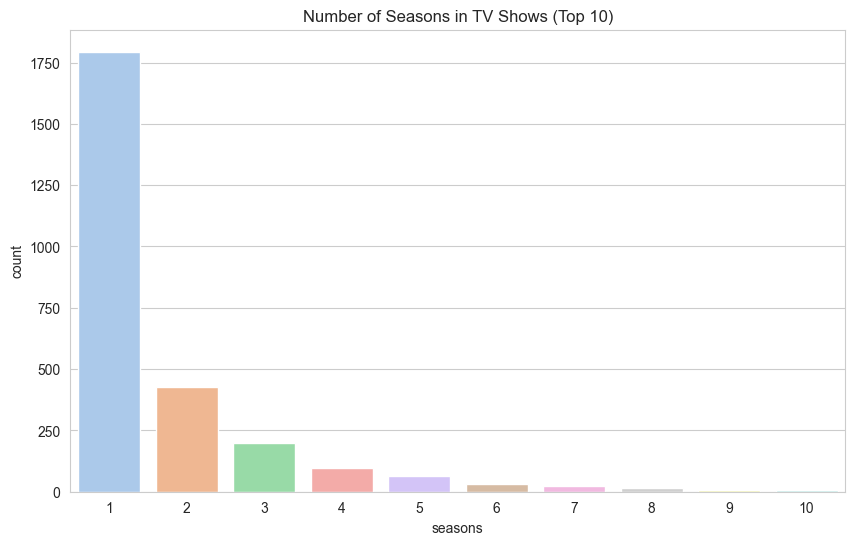

In [13]:

# TV Shows seasons analysis
tv_df = df[df['type']=="TV Show"]
tv_df['seasons'] = tv_df['duration'].str.replace(" Season","").str.replace("s","").astype(int)
plt.figure(figsize=(10,6))
sns.countplot(x="seasons", data=tv_df, palette="pastel", order=tv_df['seasons'].value_counts().index[:10])
plt.title("Number of Seasons in TV Shows (Top 10)")
plt.show()

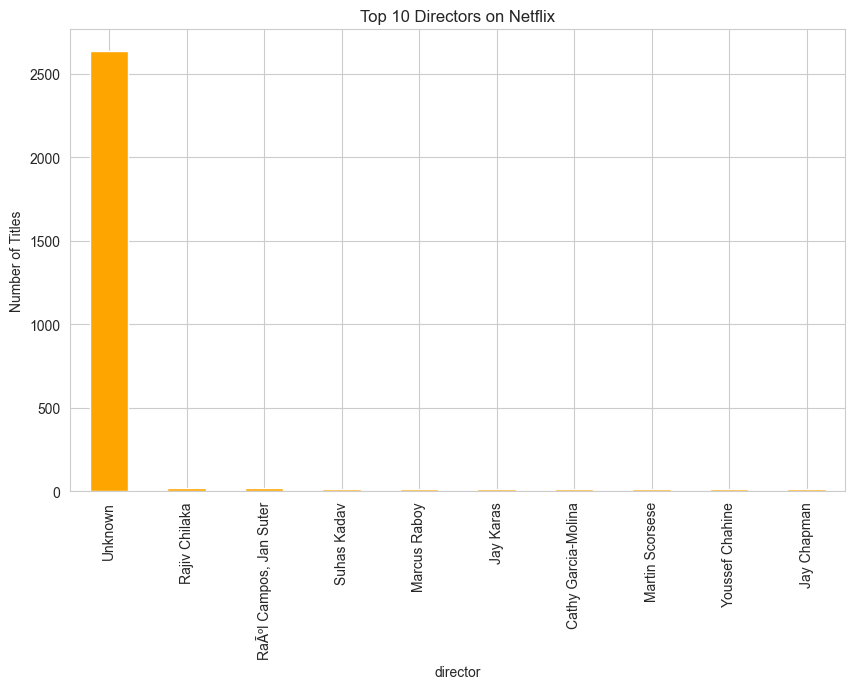

In [14]:
#   Directors with most content
df['director'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Directors on Netflix")
plt.ylabel("Number of Titles")
plt.show()


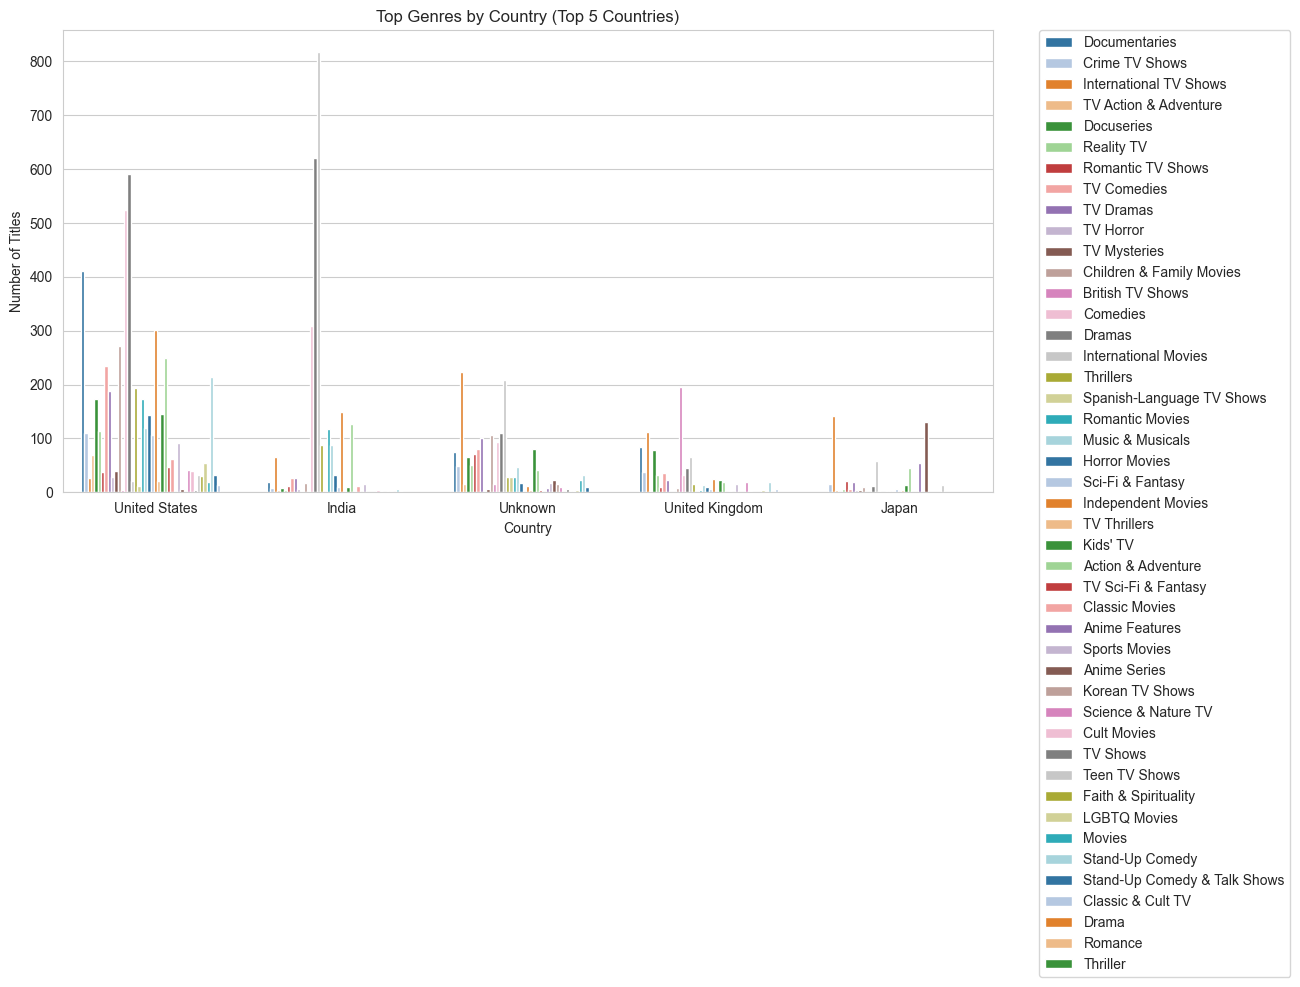

In [15]:
# Top Genres by Country
top_countries = df['country'].value_counts().head(5).index  # top 5 countries
df_top_countries = df[df['country'].isin(top_countries)]
df_top_countries_exp = df_top_countries.assign(genre=df_top_countries['listed_in'].str.split(", ")).explode('genre')

plt.figure(figsize=(12,6))
sns.countplot(x='country', hue='genre', data=df_top_countries_exp, order=top_countries, palette='tab20')
plt.title("Top Genres by Country (Top 5 Countries)")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


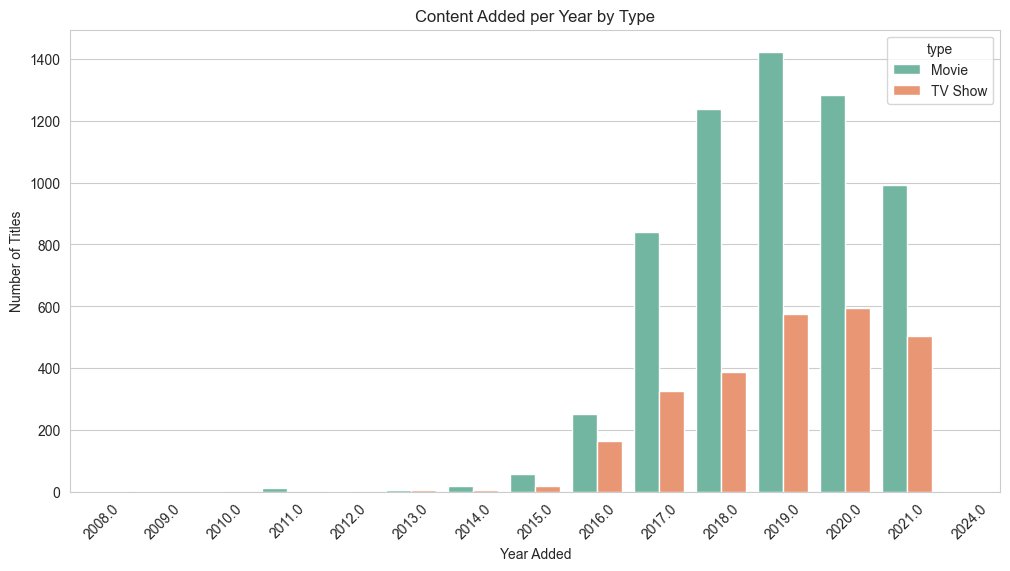

In [16]:
# Content Added per Year by Type
plt.figure(figsize=(12,6))
sns.countplot(x='year_added', hue='type', data=df, palette='Set2')
plt.title("Content Added per Year by Type")
plt.xticks(rotation=45)
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.show()


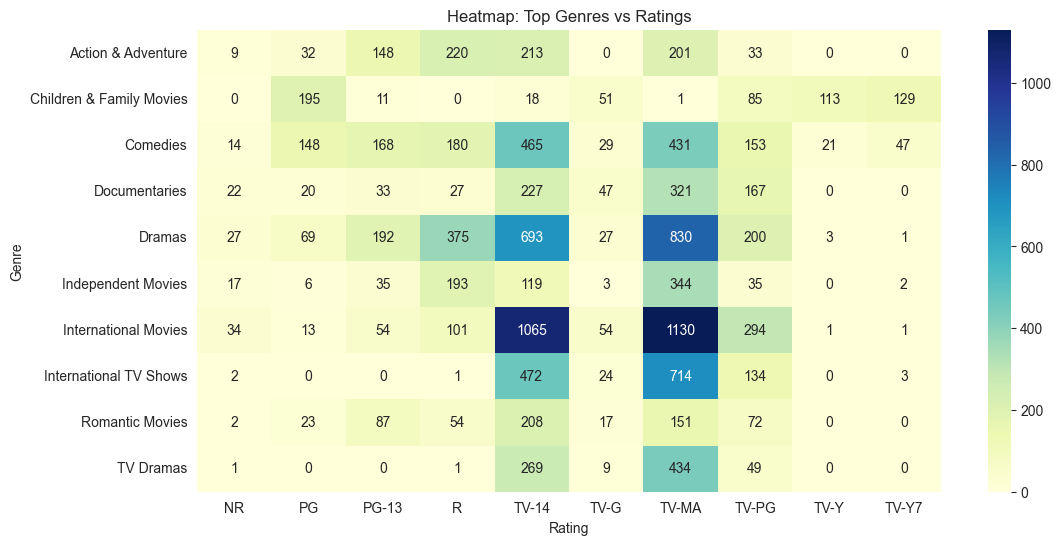

In [17]:
#  Heatmap: Top Genres vs Ratings
df_exp = df.assign(genre=df['listed_in'].str.split(", ")).explode('genre')
top_genres = df_exp['genre'].value_counts().head(10).index
top_ratings = df_exp['rating'].value_counts().head(10).index
heatmap_data = df_exp[df_exp['genre'].isin(top_genres) & df_exp['rating'].isin(top_ratings)]
heatmap_data = pd.crosstab(heatmap_data['genre'], heatmap_data['rating'])

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap: Top Genres vs Ratings")
plt.ylabel("Genre")
plt.xlabel("Rating")
plt.show()


#   Insights Summary



1. Movies are more prevalent than TV Shows on Netflix.  
2. Ratings TV-MA and TV-14 dominate.  
3. US produces the largest number of titles.  
4. Netflix content growth surged post-2015.  
5. Drama, Comedy, and International TV Shows are most frequent genres.  
6. Most movies are between 80–120 minutes; TV shows commonly have 1–3 seasons.  
7. Certain directors have multiple titles, indicating content concentration among top creators.
8. Certain genres dominate specific countries: e.g., the US produces most Comedies and Dramas, India has more International & Romantic titles.  
9. Netflix has consistently added more Movies than TV Shows in most years, except for some spikes in TV Shows after 2018.  
10. Heatmap shows that family-friendly genres (Children & Family) tend to have ratings like G/PG, while Horror and Thrillers lean toward TV-MA.  